In [2]:
import sys
sys.path.append('../..')
from consecution import Node, Pipeline, GlobalState
import random
import pandas as pd
import numpy as np
import scipy as scp
from scipy import stats
from collections import namedtuple
import datetime
import copy
from dateutil.parser import parse
import seaborn as sns
import pylab as pl
%matplotlib inline


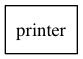

printer PhoneRec(timestamp=datetime.datetime(2015, 1, 1, 7, 56, 24, 877162), kind='incoming', duration=14.621592105622698)
printer PhoneRec(timestamp=datetime.datetime(2015, 1, 1, 8, 29, 50, 974480), kind='incoming', duration=29.567606483814995)
printer PhoneRec(timestamp=datetime.datetime(2015, 1, 1, 17, 17, 15, 475729), kind='incoming', duration=23.01361583838963)
printer PhoneRec(timestamp=datetime.datetime(2015, 1, 1, 13, 3, 57, 677962), kind='outgoing', duration=18.006689105316607)
printer PhoneRec(timestamp=datetime.datetime(2015, 1, 1, 4, 22, 29, 545555), kind='outgoing', duration=21.851253627727306)
printer PhoneRec(timestamp=datetime.datetime(2015, 1, 1, 12, 40, 4, 459966), kind='incoming', duration=17.264206916365847)
printer PhoneRec(timestamp=datetime.datetime(2015, 1, 1, 18, 53, 16, 466195), kind='outgoing', duration=11.443199129010578)
printer PhoneRec(timestamp=datetime.datetime(2015, 1, 1, 22, 15, 2, 189176), kind='incoming', duration=11.764717410801103)
printer PhoneRe

In [24]:
PhoneRec = namedtuple('PhoneRec', 'timestamp kind duration')

N_DAYS = 30
CALLS_PER_DAY = 50
START_DATE = datetime.datetime(2015, 1, 1)

def phone_generator(start_date, n_days, calls_per_day):
    calls_dist = stats.poisson(mu=calls_per_day)
    duration_dist = stats.gamma(20, 1./120)
    kind_dist = stats.bernoulli(p=.5)
    time_dist = stats.uniform()
    for day in range(n_days):
        for call in range(calls_dist.rvs()):
            rec = PhoneRec(
                timestamp=start_date + datetime.timedelta(seconds=3600*24*time_dist.rvs()),
                duration=duration_dist.rvs(),
                kind=['incoming', 'outgoing'][kind_dist.rvs()]
            )
            yield rec
        
        
    


class Printer(Node):
    def process(self, rec):
        print self.name, rec
        
class Agg(Node):
    def begin(self):
        self.agg = {}
        
    def get_key(self, rec):
        raise NotImplementedError('implement this')
        
    def get_value(self, rec):
        raise NotImplementedError('implement this')
        
    def process(self, rec):
        key = self.get_key(rec)
        val = self.get_value(rec)
    
        

pipe = Pipeline(
    Printer('printer')
)
pipe.plot(display_noteook=True)
pipe.consume(phone_generator(START_DATE, N_DAYS, CALLS_PER_DAY))
    